# 019 · 分子动力学模拟

## 目的

我们将了解为什么分子动力学( MD )模拟对于药物设计很重要，以及对与配体结合的蛋白质进行MD模拟需要哪些步骤。激酶EGFR将作为样本系统进行模拟。

### *理论*
- 分子动力学
- 力场
- 边界条件
- MD模拟和药物设计
- EGFR激酶

#### 内容*实用*
- 在Google Colab上安装
- 调整本地安装在Linux或MacOS上运行的环境
- 进口依存度
-下载PDB文件
- 制备蛋白配体复合物
- 蛋白制备
- 配体制备
- 合并蛋白和配体
- MD模拟设置
- 力场
- 系统
- 进行MD模拟
- 下载结果

## Theory

### Molecular dynamics

分子动力学是一种分析定义系统中原子和分子运动和相互作用的计算方法。该方法源于理论物理学

>一种智能，它可以随时理解自然界被激发的所有力量，以及由它组成的生物的各自位置，此外，如果这种智能足够深远，可以对这些数据进行分析，它将在该公式中包含宇宙中最大天体的运动和最轻的原子的运动：对它来说，没有什么是不确定的，未来以及过去，将呈现在它的眼中。人类的思想，在它赋予天文学的完美中，为我们提供了这种智力的微弱素描。（皮埃尔-西蒙·拉普拉斯，1820年）

让我们把拉普拉斯的这一说法作为分子动力学模拟的思想基础。换句话说，我们可以通过知道其组件的特性并应用牛顿运动定律来近似物理系统的行为。通过求解运动方程，我们可以得到系统的分子轨迹，它是一系列的快照，其中包括所有粒子的位置和速度，以及势能。为此，我们定义了一个函数，称为力场，它提供了对系统中每个粒子施加的所有力的近似描述。然后，我们使用数值积分器来解决系统的初值问题，并获得轨迹。听起来，这个过程需要相当多的过程

### Force fields



力场描述了分子内和分子间原子间的作用力。它们是含有不同力分量的参数方程(键拉伸,范德华力和更多)。参数值通常是通过实验得出的，并根据所涉及的分子和模拟设置的不同而改变。其结果是对系统能量图景的数学描述，其中作用在每个粒子上的力来自势能相对于原子坐标的梯度。


$$V(r^N) = \sum_{i \in  bonds}k_{bi} (l_i-l^0_i)^2 + \sum_{i \in  angles}k_{ai}(\theta_i - \theta^0_i)^2 + \sum_{i\in torsions} \sum_n \frac{1}{2} V_i^n[1+cos(nw_i-\gamma_i)]$$
$$+ \sum_{j=1}^{N-1}\sum_{I=j+1}^{N} f_{ij}\in ij [(\frac{r^0_{ij}}{r_{ij}})^{12}-2(\frac{r^0_{ij}}{r_{ij}})^{6}]+\frac{q_iq_j}{4\pi \in_0 r_{ij}}$$

该公式由不同分量之和构成。前三个分量包含了有关键长、键角和扭转(分子内力)的信息。最后一部分描述了分子间的非键作用力，如范德华力和静电相互作用。用上标0表示的各种参数依赖于所使用的力场，并且在AMBER力场家族的所有成员之间变化。注意到这些力场假设粒子是固定电荷的，不允许极化，也不考虑局部电荷如何影响周围的环境。
下面力场分量的可视化表示以更直观的方式展示了相同的概念。

#### 边界条件
通常，分子体系是在充满溶剂(如水)的箱子中模拟的。这些盒子是有限尺寸的，这导致了盒子边界处或附近的分子存在问题。这些分子应该与哪些分子相互作用?周期性边界条件可以通过模拟一个理论上无穷大的系统来避免这种边界伪影。位于盒子一侧边界的分子与位于盒子另一侧边界的分子相互作用。这模拟了一种情况，在这种情况下，模拟盒被自身的副本包围。在可视化这种MD模拟时，人们经常可以观察到粒子在一边离开盒子(图3 )。然而，它们以相同的速度在盒子的另一侧同时再现。对于per下的模拟

### MD模拟和药物设计

MD模拟为配体与目标结合的高度动态过程提供了宝贵的见解。当配体（或药物）接近溶液中的大分子（蛋白质）时，它会遇到一个不断运动的结构。此外，配体可能会诱发大分子的构象变化，而大分子可以最好地适应小分子。这种构象可能无法通过静态方法被发现。因此，在静态无配体结构中未观察到但可以通过MD模拟发现的结合位点，有时被称为*隐性结合位点*（[_J Med Chem_（2016），**59**（9），4035-4061]（https://doi.org/10.1021/acs.jmedchem.5b01684））。用MD模拟识别这种结合位点可以启动新的药物发现运动。在药物发现过程中，在进行更昂贵和耗时的*体外*测试之前，MD模拟也可用于估计计算确定的小分子的质量。总的来说，MD模拟在计算药物设计中构成了宝贵的资产。

### EGFR激酶

**E**pidermal **G**rowth **F**actor **R**eceptor（EGFR）是一种重要的药物靶点，对癌症和炎症有影响（[Wikipedia]（https://en.wikipedia.org/wiki/Epidermal_growth_factor_receptor））。
它是一种具有细胞外受体结构域和细胞内激酶结构域的跨膜蛋白。内源性配体表皮生长因子的结合通过二聚体化和自磷酸化导致激酶结构域的激活。然后，激活的激酶结构域可以磷酸化下游信号蛋白，触发DNA合成和细胞增殖（https://dx.doi.org/10.3390%2Fcancers9050052）。
抑制这种激酶是几种已批准的癌症药物（[DrugBank]（https://go.drugbank.com/bio_entities/BE0000767））
的潜在作用机制。在这个谈话中，我们使用这种激酶的PDB结构**3POZ**，该结构与小分子抑制剂**03P**复合，来进行MD模拟（[PDB：3POZ]（https://www.rcsb.org/structure/3poz））。

## 实用的

我们现在将使用分子动力学引擎[OpenMM]（https://github.com/openmm/openmm）
进行MD模拟，这是一个用于分子模拟的高性能工具包。它是开源的，可以用作应用程序或库。我们将把它用作Python库。

### 在Google Colab上安装

如果您正在[Google Colab]（https://colab.research.google.com/notebooks/intro.ipynb）
上工作，以下代码单元格将安装所有所需的软件包。安装[condacolab]（https://github.com/jaimergp/condacolab）
软件包将重新启动内核，这是预期的。这款笔记本也可以在本地计算机上使用，但需要相当大的计算能力。

In [1]:
try:
    import google.colab

    !pip install condacolab
    import condacolab

    condacolab.install()
except ModuleNotFoundError:
    pass

In [2]:
try:
    import condacolab
    from google.colab import files
    from IPython.display import clear_output

    condacolab.check()
    !conda install -q -y -c conda-forge mdtraj openmm openmmforcefields openff-toolkit pdbfixer pypdb rdkit
except ModuleNotFoundError:
    on_colab = False
else:
    # check if installation was succesful
    try:
        import rdkit

        on_colab = True
        clear_output()  # clear the excessive installation outputs
        print("Dependencies successfully installed!")
    except ModuleNotFoundError:
        print("Error while installing dependencies!")

### Adjust environment for local installations running on Linux or MacOS

In [3]:
import sys

if not on_colab and sys.platform.startswith(("linux", "darwin")):
    !mamba install -q -y -c conda-forge openmmforcefields
    # Notes:
    # - If you do not have mamba installed, install it or use conda instead
    # - Under MacOS with an M1 chip you may need to use
    #   CONDA_SUBDIR=osx-64 in front of the above command

  Package                       Version  Build                   Channel                    Size
──────────────────────────────────────────────────────────────────────────────────────────────────
  Install:
──────────────────────────────────────────────────────────────────────────────────────────────────

  + ambertools                     22.0  py39h464e725_3          conda-forge/linux-64     Cached
  + arpack                        3.7.0  hdefa2d7_2              conda-forge/linux-64     Cached
  + cached-property               1.5.2  hd8ed1ab_1              conda-forge/noarch       Cached
  + cached_property               1.5.2  pyha770c72_1            conda-forge/noarch       Cached
  + cython                      0.29.34  py39h227be39_0          conda-forge/linux-64     Cached
  + flatbuffers                22.12.06  hcb278e6_2              conda-forge/linux-64     Cached
  + giflib                        5.2.1  h0b41bf4_3              conda-forge/linux-64     Cached
  + keras     

### Import dependencies

In [4]:
import copy
from pathlib import Path

import requests
from IPython.display import display
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import mdtraj as md
import pdbfixer
import openmm as mm
import openmm.app as app
from openmm import unit
from openff.toolkit.topology import Molecule, Topology
from openmmforcefields.generators import GAFFTemplateGenerator

In [5]:
# create data directory if not exists
HERE = Path(_dh[-1])
DATA = HERE / "data"
DATA.mkdir(exist_ok=True)

### Download PDB file
The Protein Data Bank ([PDB](https://www.rcsb.org/)) allows for easy downloading of files via url.

In [6]:
pdbid = "3POZ"
ligand_name = "03P"
pdb_path = DATA / f"{pdbid}.pdb"
pdb_url = f"https://files.rcsb.org/download/{pdbid}.pdb"

In [7]:
r = requests.get(pdb_url)
r.raise_for_status()
with open(pdb_path, "wb") as f:
    f.write(r.content)

### Prepare the protein ligand complex

#### 蛋白质制备

成功模拟的关键部分是正确和完整的系统。从蛋白质数据库中检索到的晶体结构经常缺少原子，主要是氢，并且可能包含非标准残基。在这个演讲中，我们将使用Python软件包[PDBFixer]（https://github.com/openmm/pdbfixer）来准备蛋白质结构。然而，[PDBFixer]（https://github.com/openmm/pdbfixer）
不能很好地处理共阻化配体，因此将单独制备。

In [8]:
def prepare_protein(
    pdb_file, ignore_missing_residues=True, ignore_terminal_missing_residues=True, ph=7.0
):
    """
    使用pdbfixer从PDB文件中准备蛋白质。杂原子如配体是
    去除不符合标准的残留物替换。对已有的残基添加缺失原子。
    缺省残差默认忽略，但可以包含在内。

    Parameters
    ----------
    pdb_file: pathlib.Path or str
        PDB file containing the system to simulate.
    ignore_missing_residues: bool, optional
        If missing residues should be ignored or built.
    ignore_terminal_missing_residues: bool, optional
        If missing residues at the beginning and the end of a chain should be ignored or built.
    ph: float, optional
        pH value used to determine protonation state of residues

    Returns
    -------
    fixer: pdbfixer.pdbfixer.PDBFixer
        Prepared protein system.
    """
    fixer = pdbfixer.PDBFixer(str(pdb_file))
    fixer.removeHeterogens()  # co-crystallized ligands are unknown to PDBFixer
    fixer.findMissingResidues()  # identify missing residues, needed for identification of missing atoms

    # if missing terminal residues shall be ignored, remove them from the dictionary
    if ignore_terminal_missing_residues:
        chains = list(fixer.topology.chains())
        keys = fixer.missingResidues.keys()
        for key in list(keys):
            chain = chains[key[0]]
            if key[1] == 0 or key[1] == len(list(chain.residues())):
                del fixer.missingResidues[key]

    # if all missing residues shall be ignored ignored, clear the dictionary
    if ignore_missing_residues:
        fixer.missingResidues = {}

    fixer.findNonstandardResidues()  # find non-standard residue
    fixer.replaceNonstandardResidues()  # replace non-standard residues with standard one
    fixer.findMissingAtoms()  # find missing heavy atoms
    fixer.addMissingAtoms()  # add missing atoms and residues
    fixer.addMissingHydrogens(ph)  # add missing hydrogens
    return fixer

In [9]:
# 制备蛋白并构建仅缺失非末端残基
prepared_protein = prepare_protein(pdb_path, ignore_missing_residues=False)

#### Prepare ligand

在制备完蛋白之后，我们将目光转向了配体。再次，我们需要添加氢，但也需要确保键序被正确分配，因为一些PDB条目可能包含错误。我们使用Python包[ RDKit ] ( https://github.com/rdkit/rdkit),是一个开源的化学信息学库。
我们将通过SMILES字符串向[ RDKit ] ( https://github.com/rdkit/rdkit) )提供正确的质子化状态和键级。每个共晶配体的无电荷异构SMILES串可以在各自的[ PDB ] ( https://www.rcsb.org) entry )中找到。PDB的配体条目[ 3POZ ] ( https://www.rcsb.org/structure/3poz)的名称为[ 03P ] ( https://www.rcsb.org/ligand/03P).如果一个配体很可能以其带电形式结合或作为特定的互变异构体，这种特性需要

In [11]:
def prepare_ligand(pdb_file, resname, smiles, depict=True):
    """
    通过添加氢和分配键序，从PDB文件中制备配体。一种描绘
    对配体在制备前和制备后进行了2D渲染，以允许对其进行考察
    结果。巨大的感谢！@hannahbrucemcdonald和@glass-wags的建议。

    Parameters
    ----------
    pdb_file: pathlib.PosixPath
       PDB file containing the ligand of interest.
    resname: str
        Three character residue name of the ligand.
    smiles : str
        SMILES string of the ligand informing about correct protonation and bond orders.
    depict: bool, optional
        show a 2D representation of the ligand

    Returns
    -------
    prepared_ligand: rdkit.Chem.rdchem.Mol
        Prepared ligand.
    """
    # split molecule
    rdkit_mol = Chem.MolFromPDBFile(str(pdb_file))
    rdkit_mol_split = Chem.rdmolops.SplitMolByPDBResidues(rdkit_mol)

    # extract the ligand and remove any already present hydrogens
    ligand = rdkit_mol_split[resname]
    ligand = Chem.RemoveHs(ligand)

    # assign bond orders from template
    reference_mol = Chem.MolFromSmiles(smiles)
    prepared_ligand = AllChem.AssignBondOrdersFromTemplate(reference_mol, ligand)
    prepared_ligand.AddConformer(ligand.GetConformer(0))

    # protonate ligand
    prepared_ligand = Chem.rdmolops.AddHs(prepared_ligand, addCoords=True)
    prepared_ligand = Chem.MolFromMolBlock(Chem.MolToMolBlock(prepared_ligand))

    # 2D depiction
    if depict:
        ligand_2d = copy.deepcopy(ligand)
        prepared_ligand_2d = copy.deepcopy(prepared_ligand)
        AllChem.Compute2DCoords(ligand_2d)
        AllChem.Compute2DCoords(prepared_ligand_2d)
        display(
            Draw.MolsToGridImage(
                [ligand_2d, prepared_ligand_2d], molsPerRow=2, legends=["original", "prepared"]
            )
        )

    # return ligand
    return prepared_ligand

用取自[ 03P ]的PDB条目的同分异构体SMILES字符串调用此函数( https://www.rcsb.org/ligand/03P)
返回正确制备的配体)。打印是对原始和准备好的配体进行检查的2D表示。

In [ ]:
# def prepare_ligand(pdb_file, resname, smiles, depict=True):
#     # 使用 SMILES 直接创建参考配体
#     reference_mol = Chem.MolFromSmiles(smiles)
#     
#     # 确保从 SMILES 生成的分子正确
#     if reference_mol is None:
#         raise ValueError("Invalid SMILES string provided.")
#     
#     # 尝试从 PDB 文件加载配体
#     rdkit_mol = Chem.MolFromPDBFile(str(pdb_file))
#     rdkit_mol_split = Chem.rdmolops.SplitMolByPDBResidues(rdkit_mol)
# 
#     # 获取配体
#     if resname not in rdkit_mol_split:
#         raise ValueError(f"Residue name {resname} not found in PDB file.")
#     ligand = rdkit_mol_split[resname]
#     ligand = Chem.RemoveHs(ligand)
# 
#     # 忽略 PDB 文件的键序信息，直接使用 SMILES 重建
#     prepared_ligand = Chem.MolFromSmiles(smiles)
# 
#     # 添加氢原子
#     prepared_ligand = Chem.rdmolops.AddHs(prepared_ligand)
# 
#     # 2D 结构显示
#     if depict:
#         AllChem.Compute2DCoords(prepared_ligand)
#         display(Draw.MolToImage(prepared_ligand))
# 
#     return prepared_ligand
# 
# 


[12:25:08] WARNING: More than one matching pattern found - picking one



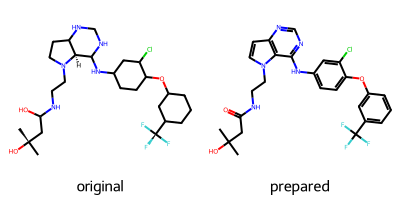

In [12]:
smiles = "CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(c4)C(F)(F)F)c(Cl)c3)c12"
rdkit_ligand = prepare_ligand(pdb_path, ligand_name, smiles)

#### 合并蛋白质和配体

在下一步中，我们想使用Python软件包[MDTraj]（https://github.com/mdtraj/mdtraj）合并准备好的蛋白质和配体结构。[MDTraj]（https://github.com/mdtraj/mdtraj）
可以处理制备的蛋白质，它目前是一个[PDBFixer]（https://github.com/openmm/pdbfixer）分子，这种格式的拓扑结构和原子位置与[OpenMM Modeler]（http://docs.openmm.org/latest/userguide/application.html#model-building-and-editing）
拓扑和位置相似，通常可与之互换。然而，对于配体，我们需要进行几次转换，因为它目前是一个[RDKit]（https://github.com/rdkit/rdkit）分子。

In [13]:
def rdkit_to_openmm(rdkit_mol, name="LIG"):
    """
    将一个RDKit分子转换为一个OpenMM分子。
    受到@ Hannahbrucemcdonald和@ Glass - W的启发。

    Parameters
    ----------
    rdkit_mol: rdkit.Chem.rdchem.Mol
        RDKit molecule to convert.
    name: str
        Molecule name.

    Returns
    -------
    omm_molecule: openmm.app.Modeller
        OpenMM modeller object holding the molecule of interest.
    """
    # convert RDKit to OpenFF
    off_mol = Molecule.from_rdkit(rdkit_mol)

    # add name for molecule
    off_mol.name = name

    # add names for atoms
    element_counter_dict = {}
    for off_atom, rdkit_atom in zip(off_mol.atoms, rdkit_mol.GetAtoms()):
        element = rdkit_atom.GetSymbol()
        if element in element_counter_dict.keys():
            element_counter_dict[element] += 1
        else:
            element_counter_dict[element] = 1
        off_atom.name = element + str(element_counter_dict[element])

    # convert from OpenFF to OpenMM
    off_mol_topology = off_mol.to_topology()
    mol_topology = off_mol_topology.to_openmm()
    mol_positions = off_mol.conformers[0]

    # convert units from Ångström to nanometers
    # since OpenMM works in nm
    mol_positions = mol_positions.to("nanometers")

    # combine topology and positions in modeller object
    omm_mol = app.Modeller(mol_topology, mol_positions)

    return omm_mol

In [14]:
omm_ligand = rdkit_to_openmm(rdkit_ligand, ligand_name)

Now protein and ligand are both in [OpenMM](https://github.com/openmm/openmm) like formats and can be merged with [MDTraj](https://github.com/mdtraj/mdtraj).

In [15]:
def merge_protein_and_ligand(protein, ligand):
    """
    Merge two OpenMM objects.

    Parameters
    ----------
    protein: pdbfixer.pdbfixer.PDBFixer
        Protein to merge.
    ligand: openmm.app.Modeller
        Ligand to merge.

    Returns
    -------
    complex_topology: openmm.app.topology.Topology
        The merged topology.
    complex_positions: openmm.unit.quantity.Quantity
        The merged positions.
    """
    # combine topologies
    md_protein_topology = md.Topology.from_openmm(protein.topology)  # using mdtraj for protein top
    md_ligand_topology = md.Topology.from_openmm(ligand.topology)  # using mdtraj for ligand top
    md_complex_topology = md_protein_topology.join(md_ligand_topology)  # add them together
    complex_topology = md_complex_topology.to_openmm()

    # combine positions
    total_atoms = len(protein.positions) + len(ligand.positions)

    # create an array for storing all atom positions as tupels containing a value and a unit
    # called OpenMM Quantities
    complex_positions = unit.Quantity(np.zeros([total_atoms, 3]), unit=unit.nanometers)
    complex_positions[: len(protein.positions)] = protein.positions  # add protein positions
    complex_positions[len(protein.positions) :] = ligand.positions  # add ligand positions

    return complex_topology, complex_positions

In [26]:
omm_ligand = rdkit_to_openmm(rdkit_ligand, name=ligand_name)
complex_topology, complex_positions = merge_protein_and_ligand(prepared_protein, omm_ligand)

~/.miniconda3/envs/teachopencadd/lib/python3.9/site-packages/openmm/unit/quantity.py:750: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  self._value[key] = value / self.unit


In [27]:
print("Complex topology has", complex_topology.getNumAtoms(), "atoms.")
# NBVAL_CHECK_OUTPUT

Complex topology has 5561 atoms.


### MD模拟设置

我们现在可以使用准备好的复合物来设置MD模拟。

#### 力场

像琥珀这样的普通力场具有氨基酸、核酸、水和离子的参数，通常根据您的目标提供几种选择。我们使用`amber14-all.xml`力场文件，该文件与OpenMM一起发货，包括蛋白质、DNA、RNA和脂质的参数。为了解决，我们使用标准的三站点[水模型](https://en.wikipedia.org/wiki/Water_model) 
[**TIP3P**](https://aip.scitation.org/doi/10.1063/1.445869)。

然而，配体的参数不包括在内。为了生成这些参数，我们可以使用**G**eneral **A**MBER **F**orce**F**ield ([GAFF](http://ambermd.org/antechamber/gaff.html))，
该软件包在Python软件包[OpenMM Forcefields](https://github.com/openmm/openmmforcefields)
中实现。以下函数生成一个包含标准琥珀参数的力场对象，如果需要，还包括小分子的参数。

In [17]:
def generate_forcefield(
    rdkit_mol=None, protein_ff="amber14-all.xml", solvent_ff="amber14/tip3pfb.xml"
):
    """
    生成一个OpenMM Forcefield对象并注册一个小分子。

    Parameters
    ----------
    rdkit_mol: rdkit.Chem.rdchem.Mol
        Small molecule to register in the force field.
    protein_ff: string
        Name of the force field.
    solvent_ff: string
        Name of the solvent force field.

    Returns
    -------
    forcefield: openmm.app.Forcefield
        Forcefield with registered small molecule.
    """
    forcefield = app.ForceField(protein_ff, solvent_ff)

    if rdkit_mol is not None:
        gaff = GAFFTemplateGenerator(
            molecules=Molecule.from_rdkit(rdkit_mol, allow_undefined_stereo=True)
        )
        forcefield.registerTemplateGenerator(gaff.generator)

    return forcefield

In [18]:
forcefield = generate_forcefield(rdkit_ligand)

#### System

利用我们配置的力场，我们现在可以使用[ OpenMM莫德勒] ( http://docs.openmm.org/latest/userguide/application.html # model-build-and-editing )类来创建MD环境，这是一个包含复合物并充满溶剂的模拟盒子。标准溶剂为含有一定量离子的水。箱体的尺寸可以通过多种方式确定。我们用一个填充来定义它，这就产生了一个立方体盒子，它的维数依赖于复形的最大维数。
>注意，这一步可能需要很长的时间，以分钟为单位，取决于你的硬件。

In [19]:
modeller = app.Modeller(complex_topology, complex_positions)
modeller.addSolvent(forcefield, padding=1.0 * unit.nanometers, ionicStrength=0.15 * unit.molar)

借助我们的解系统和力场，我们最终可以创建一个[OpenMM系统]（http://docs.openmm.org/development/api-python/generated/openmm.openmm.System.html#openmm.openmm.System）
并设置模拟。

除了系统之外，模拟还需要一个集成器。[OpenMM集成器]（http://docs.openmm.org/development/api-python/library.html#integrators）
定义了一种通过积分运动方程来模拟系统的方法。所选的**朗格文集成器**使用朗格文方程。所有不同类型的集成商的列表可以在[OpenMM文档]（http://docs.openmm.org/development/api-python/library.html#integrators）
中找到。要进一步了解**朗格文集成器**，我们建议阅读朗格文方程，例如在[维基百科]（https://en.wikipedia.org/wiki/Langevin_equation）上。

In [20]:
system = forcefield.createSystem(modeller.topology, nonbondedMethod=app.PME)
integrator = mm.LangevinIntegrator(
    300 * unit.kelvin, 1.0 / unit.picoseconds, 2.0 * unit.femtoseconds
)
simulation = app.Simulation(modeller.topology, system, integrator)
simulation.context.setPositions(modeller.positions)

### 执行MD模拟

现在一切都设置好了，我们可以进行模拟了。我们需要设置起始位置，并将系统的能量最小化，以获得低能量起始配置，这对减少严重原子碰撞导致模拟失败的机会很重要。节能最小化系统被节省了。

In [21]:
simulation.minimizeEnergy()
with open(DATA / "topology.pdb", "w") as pdb_file:
    app.PDBFile.writeFile(
        simulation.topology,
        simulation.context.getState(getPositions=True, enforcePeriodicBox=True).getPositions(),
        file=pdb_file,
        keepIds=True,
    )

一旦最小化完成，我们就可以执行MD模拟。在这个谈话中，我们将做一个简短的模拟来说明。用于研究目的的模拟跨越了几纳秒，甚至高达微秒。我们将只模拟100 ps的分子动力学，对应于每个2 fs的5万步。我们每10 ps（5000步）保存一次分子“快照”，总共10帧。结果保存在.xtc文件中，其中包含给定时间点所有原子的坐标。与之前编写的能量最小化系统的PDB文件一起，它为我们提供了以后分析所需的所有信息。

**注**：如果不是在Google Colab上，这个只会生成20 fs的轨迹。然而，如果您有一个好的GPU可用，您还可以增加模拟时间。

In [22]:
# output settings
if on_colab:
    steps = 50000  # corresponds to 100 ps
    write_interval = 5000  # write every 10 ps
    log_interval = 2500  # log progress to stdout every 5 ps
else:
    steps = 10  # corresponds to 20 fs
    write_interval = 1  # write every 2 fs
    log_interval = 1  # log progress to stdout every 2 fs
simulation.reporters.append(
    md.reporters.XTCReporter(file=str(DATA / "trajectory.xtc"), reportInterval=write_interval)
)
simulation.reporters.append(
    app.StateDataReporter(
        sys.stdout,
        log_interval,
        step=True,
        potentialEnergy=True,
        temperature=True,
        progress=True,
        remainingTime=True,
        speed=True,
        totalSteps=steps,
        separator="\t",
    )
)

系统中所有粒子的速度从给定温度下的分布中随机选择。我们选择了300开尔文，比室温高了一些度。
生成一个随机种子，但可以显式给出以重现结果。
然后通过采取之前定义的步骤进行仿真。

In [23]:
simulation.context.setVelocitiesToTemperature(300 * unit.kelvin)
simulation.step(steps)  # perform the simulation

#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
10.0%	1	-992629.2532507611	280.59188983053207	0	--
20.0%	2	-978514.3140385933	250.1140053691449	1.88	0:00
30.0%	3	-961427.9816461714	214.09328454071326	1.92	0:00
40.0%	4	-944609.5657245225	180.29949178380076	1.9	0:00
50.0%	5	-938426.3768274506	165.17778679274846	1.89	0:00
60.0%	6	-930096.1319021038	149.4126629808844	1.89	0:00
70.0%	7	-926924.8985479049	143.336941762251	1.9	0:00
80.0%	8	-930284.4123182578	149.77757492192208	1.91	0:00
90.0%	9	-932318.9156875424	155.78884925604478	1.9	0:00
100.0%	10	-937770.7580560565	167.02287919129623	1.9	0:00


In [24]:
# Check the trajectory exists and is not empty
(DATA / "trajectory.xtc").stat().st_size > 0
# NBVAL_CHECK_OUTPUT

True

### 下载结果

如果您正在Google Colab上下载MD模拟结果，您可以执行以下单元格。

In [25]:
if on_colab:
    files.download(DATA / "topology.pdb")
    files.download(DATA / "trajectory.xtc")

## 讨论

我们成功对蛋白质配体复合物进行了MD模拟。然而，我们只模拟了相当短的时间，以保持谈话的执行时间短。为了解决药物设计中的关键问题，通常需要更长的模拟。